# <span style="color:red">문제 1</span>
    - 유방암 결과를 분류하는 인공지능신경망 모델을 만들고, predict method를 이용하여 목표변수 범주를 예측하라.
    - 그리고 모델의 정확도와 Confusion matrix를 구하라.
    - 데이터 : 유방암.csv(변수 : 31개, 자료 수 : 320개)
    - 목표변수 : diagnosis, 양성(108개), 음성(212개) 

## 문제풀이
    1. 데이터 구성하기
        - 불러오기
        - 결측치 확인 및 처리
        - 더미변수 생성
        - 데이터 분할(train(0.6), test(0.4))
    2. 모델 생성
    3. 모델 파라미터 조정
    4. 결론 도출

In [1]:
# 데이터 구성 패키지:Series, DataFrame
import pandas as pd

# 데이터 시각화 패키지
import matplotlib.pyplot as plt
import matplotlib

# Numpy 패키지
import numpy as np

import seaborn as sns

# train, test 데이터 분할 함수
from sklearn.model_selection import train_test_split

# GridSearchCV : 최적의 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# confusion matrix
from sklearn.metrics import confusion_matrix

# DecisionTreeClassifier: 분류의사결정나무
from sklearn.tree import DecisionTreeClassifier

# RandomForestClassifier: 분류랜덤포레스트
from sklearn.ensemble import RandomForestClassifier

# export_graphviz: graphviz 패키지가 사용할 수 있는 .dot 확장자 파일로 저장
from sklearn.tree import export_graphviz

# graphviz import: 의사결정 나무 모델 시각화  .dot 확장자 파일 불러오는 패키지
import graphviz

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

# KNN 패키지
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import confusion_matrix, classification_report

# SVC 패키지
from sklearn.svm import SVC

from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')
# 나눔 고딕 적용
matplotlib.rc("font", family = "NanumGothic")
matplotlib.rc('axes', unicode_minus=False)

## 데이터 구성하기

In [2]:
# 데이터 불러오기
df_raw = pd.read_csv('/home/piai/Dayonizzang._.r/BigData 실습/Big Data 분석/유방암.csv', encoding='euc-kr')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [3]:
# drop: X변수외 변수 삭제
df_raw_x = df_raw.drop(["diagnosis"], axis =1, inplace = False)
df_raw_y = df_raw["diagnosis"] 

# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성 
df_x_dummy = pd.get_dummies(df_raw_x)
df_raw_y = np.where(df_raw_y == "양성", 0, 1)

# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_dummy, # 설명변수 데이터
                                                                df_raw_y, # 목표변수 데이터
                                                                test_size = 0.4, # test 데이터의 비율
                                                                random_state = 1234)  # random state

## 기본 옵션으로 모델 생성

In [4]:
nm_uncustomized = MLPClassifier(random_state = 1234)
nm_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 셋 정확도
print("Accuracy on train set: {:.3f}".format(nm_uncustomized.score(df_train_x, df_train_y)))

# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(nm_uncustomized.score(df_test_x, df_test_y)))

Accuracy on train set: 0.901
Accuracy on test set: 0.930


## 모델 Parameter 조정 - Hidden

In [5]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# c: 규제(0.01, 0.1, 1, 10)
para_hidden = [20 * hidden for hidden in range(1, 9)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state = 1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

# C별 정확도 테이블
df_accuracy_hidden.round(3)

,HiddenLayer,TrainAccuracy,TestAccuracy
0,20,0.401,0.242
1,40,0.594,0.758
2,60,0.917,0.930
3,80,0.932,0.898
4,100,0.901,0.930
5,120,0.599,0.758
6,140,0.599,0.758
7,160,0.599,0.758


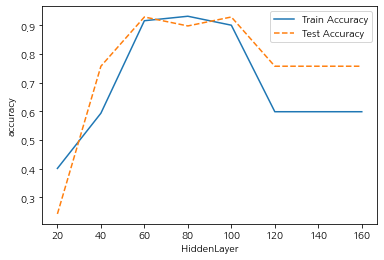

In [6]:
# 정확도를 그래프로 표현
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("HiddenLayer")
plt.legend()

### 모델 Parameter 조정 결과  - Hidden
- Hidden Layer가 60일 때, TestAccuracy가 0.930으로 가장 높았으므로 60을 채택한다.

## 모델 Parameter 조정  - Function

In [7]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# c: 규제(0.01, 0.1, 1, 10)
para_function = ["logistic", "tanh", "relu"]

for v_function in para_function:
    nn = MLPClassifier(activation = v_function, random_state = 1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivationFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy

# C별 정확도 테이블
df_accuracy_function.round(3)

,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.948,0.898
1,tanh,0.958,0.891
2,relu,0.901,0.930


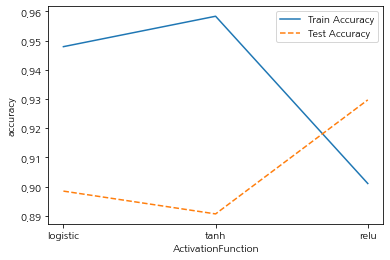

In [8]:
# 정확도를 그래프로 표현
plt.plot(para_function, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_function, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("ActivationFunction")
plt.legend()

### 모델 Parameter 조정 결과  - Function
- Function이 ReLU일 때, TestAccuracy가 0.930으로 가장 높았으므로 RuLU를 채택한다.

## Sacled 변환

In [9]:
# 변수명 저장
v_feature_names = df_train_x.columns

# StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_names)
df_scaled.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.149283,-1.156442,-0.153789,-0.224951,0.490637,0.139396,-0.094470,-0.301949,0.525611,0.511081
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.341759,-2.517236,-1.380396,-1.124201,0.254373,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.534893,-0.143296,0.445031,0.432104,-0.613360,-0.367031,0.004076,0.172850,0.223844,-0.886803
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.263312,-1.490846,-0.312546,-0.354487,-1.339335,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-0.951354,-1.934512,-0.997708,-0.869505,-1.783511,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278


In [10]:
# 데이터 분할
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.4,random_state = 1234)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("train data Y size : {}".format(df_scaled_test_x.shape))

train data X size : (192, 30)
train data Y size : (128, 30)


In [11]:
nn_scaled = MLPClassifier(random_state=1234)
nn_scaled.fit(df_scaled_train_x, df_train_y)

# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(nn_scaled.score(df_scaled_train_x, df_train_y)))

# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(nn_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set: 0.995
Accuracy on test set: 0.953


### Scale 변환 결과
- Neural Network는 Hidden Layer와 Acvtivate Function의 조합으로 이루어진 모델이다.
- 실제로 Scale을 변환한 결과 score가 93.0에서 95.3로 상승한 것을 알 수 있다.
- Scale을 변환하였으니, 앞서 정했던 Hiiden Layer의 개수와 Activate Function을 재조정해야한다.

## 모델 Parameter 조정 - Hidden 재조정

In [12]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# c: 규제(0.01, 0.1, 1, 10)
para_hidden = [20 * hidden for hidden in range(1, 11)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes=(v_hidden, v_hidden), random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

# C별 정확도 테이블
df_accuracy_hidden.round(3)

,HiddenLayer,TrainAccuracy,TestAccuracy
0,20,0.995,0.953
1,40,0.995,0.953
2,60,0.995,0.953
3,80,1.000,0.938
4,100,1.000,0.945
5,120,1.000,0.953
6,140,1.000,0.945
7,160,1.000,0.953
8,180,1.000,0.953
9,200,1.000,0.945


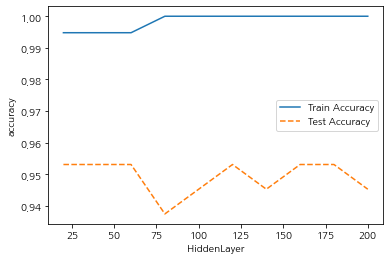

In [13]:
# 정확도를 그래프로 표현
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("HiddenLayer")
plt.legend()
hidden_layer_sizes = 20

### 모델 Parameter 재조정 결과 - Hidden
- hidden layer는 20을 채택한다.

## 모델 Parameter 재조정 - Function

In [14]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# c: 규제(0.01, 0.1, 1, 10)
para_function = ["logistic", "tanh", "relu"]

for v_function in para_function:
    nn = MLPClassifier(activation=v_function, hidden_layer_sizes=(20, 20), random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivationFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy

# C별 정확도 테이블
df_accuracy_function.round(3)

,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.979,0.930
1,tanh,0.995,0.945
2,relu,0.995,0.953


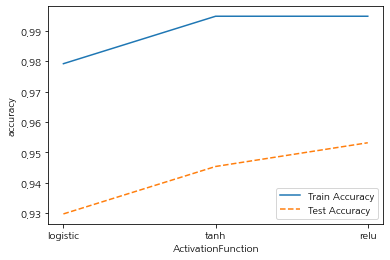

In [15]:
# 정확도를 그래프로 표현
plt.plot(para_function, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_function, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("ActivationFunction")
plt.legend()
activation = 'relu'

### 모델 Parameter 재조정 결과 - Fucntion
- Scaled 후 재조정 결과, relu 함수의 score가 가장 높으므로, relu를 채택한다.

## 모델 Parameter 재조정 - Solver

In [16]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# c: 규제(0.01, 0.1, 1, 10)
para_solver = ["lbfgs", "sgd", "adam"]

for v_solver in para_solver:
    nn = MLPClassifier(solver=v_solver, activation="relu", hidden_layer_sizes=(20, 20), random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_solver = pd.DataFrame()
df_accuracy_solver["Solver"] = para_solver
df_accuracy_solver["TrainAccuracy"] = train_accuracy
df_accuracy_solver["TestAccuracy"] = test_accuracy

# C별 정확도 테이블
df_accuracy_solver.round(3)

,Solver,TrainAccuracy,TestAccuracy
0,lbfgs,1.000,0.969
1,sgd,0.974,0.914
2,adam,0.995,0.953


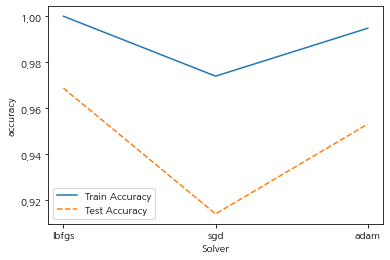

In [17]:
# 정확도를 그래프로 표현
plt.plot(para_solver, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_solver, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Solver")
plt.legend()
solver = 'lbfgs'

### 모델 Parameter 재조정 결과 - Solver
- lbfgs의 score가 가장 크므로 lbfgs를 채택한다.

## 모델 Parameter 조정 - Batch

In [18]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# c: 규제(0.01, 0.1, 1, 10)
para_batch = [20 * batch for batch in range(1, 10)]

for v_batch in para_batch:
    nn = MLPClassifier(batch_size=v_batch, solver="lbfgs", activation = "relu", hidden_layer_sizes=(20, 20), random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_batch = pd.DataFrame()
df_accuracy_batch["MiniBatch"] = para_batch
df_accuracy_batch["TrainAccuracy"] = train_accuracy
df_accuracy_batch["TestAccuracy"] = test_accuracy

# C별 정확도 테이블
df_accuracy_batch.round(3)

,MiniBatch,TrainAccuracy,TestAccuracy
0,20,1.0,0.969
1,40,1.0,0.969
2,60,1.0,0.969
3,80,1.0,0.969
4,100,1.0,0.969
5,120,1.0,0.969
6,140,1.0,0.969
7,160,1.0,0.969
8,180,1.0,0.969


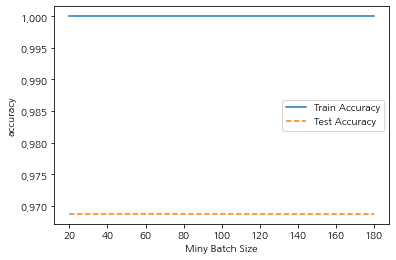

In [19]:
# 정확도를 그래프로 표현
plt.plot(para_batch, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_batch, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Miny Batch Size")
plt.legend()
minibatch = 20

In [20]:
nn_final = MLPClassifier(hidden_layer_sizes=(20, 20), activation="relu", \
                        solver='lbfgs', batch_size = 20, random_state=1234)
nn_final.fit(df_scaled_train_x, df_train_y)
y_pred = nn_final.predict(df_scaled_test_x)

# train 데이터 셋 정확도
print("train data accuracy: {0:.3f}".format(nn_final.score(df_scaled_train_x, df_train_y)))

# test 데이터 셋 정확도
print("test data accuracy: {0:.3f}\n".format(nn_final.score(df_scaled_test_x, df_test_y)))

# confusion matrix"
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

print(classification_report(df_test_y, y_pred, digits=3))

train data accuracy: 1.000
test data accuracy: 0.969

Confusion matrix: 
[[30  1]
 [ 3 94]]
              precision    recall  f1-score   support

           0      0.909     0.968     0.937        31
           1      0.989     0.969     0.979        97

    accuracy                          0.969       128
   macro avg      0.949     0.968     0.958       128
weighted avg      0.970     0.969     0.969       128



## <span style="color:red">결론</span>
- "유방암" 데이터에 대해서 인공 신경망 모델을 생성하고, 범주를 예측해보았다.
- 우선, Hyper-parameter를 수정해나가며 모델의 정확도를 확인한 결과 다음과 같은 결과를 얻을 수 있었다.
    - 생성모델의 Train 데이터에 대한 정확도 : 100.0%
    - 생성모델의 Test 데이터에 대한 정확도 : 96.9%
- 생성한 모델의 정확도가 어느정도 높기에 해당 모델은 설명력이 있다고 말할 수 있다. 하지만 test 데이터에 대한 학습결과 과적합이 발생했다는 것 또한 알 수있다.

# <span style="color:red">문제 2</span>
    - 유방암 데이터를 이용하여 k(이웃 수)가 3~30까지 변화할 때까지 정확도(accuracy)의 변화를 그림으로 나타내고 predict method를 이용하여 예측값을 구해라. 그리고 실제값과의 정확도와 confusion matrix를 구해라

## 문제풀이
    1. 데이터 구성하기
        - 불러오기
        - 결측치 확인 및 처리
        - 더미변수 생성
        - 데이터 분할(train(0.6), test(0.4))
    2. 모델 생성
    3. 모델 파라미터 조정
    4. 결론 도출

## 데이터 구성하기

In [21]:
# 데이터 불러오기
df_raw = pd.read_csv('/home/piai/Dayonizzang._.r/BigData 실습/Big Data 분석/유방암.csv', encoding='euc-kr')

# drop: X변수외 변수 삭제
df_raw_x = df_raw.drop(["diagnosis"], axis =1, inplace = False)
df_raw_y = df_raw["diagnosis"] 

# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성 
df_x_dummy = pd.get_dummies(df_raw_x)
df_raw_y = np.where(df_raw_y == "음성", 0, 1)

# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_dummy, # 설명변수 데이터
                                                                df_raw_y, # 목표변수 데이터
                                                                test_size = 0.3, # test 데이터의 비율
                                                                random_state = 1234)  # random state

In [22]:
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


## 모델 생성

In [23]:
# KNN 모델 생성(default 설정)
knn_uncusotomized = KNeighborsClassifier()
knn_uncusotomized.fit(df_train_x, df_train_y)

# train 데이터 셋 정확도
print("Accuracy on train set: {:.3f}".format(knn_uncusotomized.score(df_train_x, df_train_y)))

# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(knn_uncusotomized.score(df_test_x, df_test_y)))

Accuracy on train set: 0.942
Accuracy on test set: 0.906


## 모델 Parameter 조정 - Neighbors

In [24]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# 최대 이웃 수: 1~15
para_n_neighbors = [i for i in range(1, 16)]

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors["Neighbors"] = para_n_neighbors
df_accuracy_neighbors["TrainAccuracy"] = train_accuracy
df_accuracy_neighbors["TestAccuracy"] = test_accuracy
df_accuracy_neighbors.round(3)

,Neighbors,TrainAccuracy,TestAccuracy
0,1,1.000,0.865
1,2,0.942,0.906
2,3,0.933,0.885
3,4,0.929,0.896
4,5,0.942,0.906
5,6,0.946,0.927
6,7,0.938,0.917
7,8,0.933,0.917
8,9,0.929,0.917
9,10,0.911,0.896


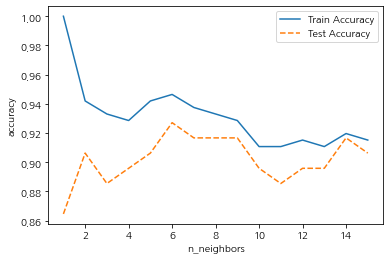

In [25]:
# 정확도를 그래프로 표현
plt.plot(para_n_neighbors, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_neighbors, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("n_neighbors")
plt.legend()

### 모델 Parameter 조정 결과 - Neighbors
- Neighbors의 값이 6일 때 TestAccuracy의 값이 가장 높으므로 6을 채택한다.

## 모델 Parameter 조정 - Neighbors + Weight

In [26]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# 이웃 수
para_n_neighbors = [i for i in range(1,11)] * 2

# 가중치(uniform, distance)
para_weights = (["uniform"]) * 10 + (["distance"] * 10)

# zip( list1, list2, …)를 사용하면 list1과 list2의 인덱스별 값을 하나씩 가져옴
# 1번 loop: n_neighbors = para_n_neihtbors[0], weights = para_weights[0]
# 2번 loop: n_neighbors = para_n_neihtbors[1], weights = para_weights[1]
for (v_n_neighbors, v_weights) in zip(para_n_neighbors, para_weights):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, weights = v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))    

# 데이터 테이블로 저장
df_accuracy_weights = pd.DataFrame()
df_accuracy_weights["Neighbors"] = para_n_neighbors
df_accuracy_weights["Weights"] = para_weights
df_accuracy_weights["TrainAccuracy"] = train_accuracy
df_accuracy_weights["TestAccuracy"] = test_accuracy
df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,1.000,0.865
1,2,uniform,0.942,0.906
2,3,uniform,0.933,0.885
3,4,uniform,0.929,0.896
4,5,uniform,0.942,0.906
5,6,uniform,0.946,0.927
6,7,uniform,0.938,0.917
7,8,uniform,0.933,0.917
8,9,uniform,0.929,0.917
9,10,uniform,0.911,0.896


In [27]:
# 그림을 그리기 위해 데이터의 형태를 변환
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index = "Neighbors", columns = "Weights",
                                                      values = ["TrainAccuracy", "TestAccuracy"])
df_accuracy_weights_pivot

TrainAccuracy           TestAccuracy          
Weights        distance   uniform     distance   uniform
Neighbors                                               
1                   1.0  1.000000     0.864583  0.864583
2                   1.0  0.941964     0.864583  0.906250
3                   1.0  0.933036     0.885417  0.885417
4                   1.0  0.928571     0.864583  0.895833
5                   1.0  0.941964     0.895833  0.906250
6                   1.0  0.946429     0.895833  0.927083
7                   1.0  0.937500     0.906250  0.916667
8                   1.0  0.933036     0.906250  0.916667
9                   1.0  0.928571     0.916667  0.916667
10                  1.0  0.910714     0.895833  0.895833

In [28]:
# pivot을 이용할 경우, columns와 values이 2개의 level로 이루어지므로 하나의 level로 변환
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns = level0 + "_" + level1
df_accuracy_weights_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.864583,0.864583
2,1.0,0.941964,0.864583,0.906250
3,1.0,0.933036,0.885417,0.885417
4,1.0,0.928571,0.864583,0.895833
5,1.0,0.941964,0.895833,0.906250


<AxesSubplot:xlabel='Neighbors'>

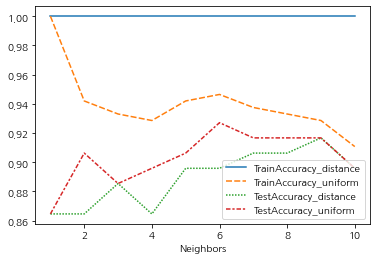

In [29]:
# 그래프 생성. 변수별 linestyle 구분
sns.lineplot(data = df_accuracy_weights_pivot)

### 모델 Parameter 조정 결과 - Neighbors + Weight
- 앞서 정한 Neightbors가 6일 때의 가장 적절한 Weight를 뽑아내는 Uniform을 채택한다.

## 모델 Parameter 조정 결과 - Neighbors + Weight + Metric

In [30]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# 이웃 수
para_n_neighbors = [i for i in range(1,11)] * 3

# 거리 계산 방법 (minkowski, euclidean, manhattan)
para_metric = ["minkowski"] * 10 + ["euclidean"] * 10 + ["manhattan"] * 10

for (v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, metric = v_metric, weights = "uniform")
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))    

# 데이터 테이블로 저장
df_accuracy_metric = pd.DataFrame()
df_accuracy_metric["Neighbors"] = para_n_neighbors
df_accuracy_metric["Metric"] = para_metric
df_accuracy_metric["TrainAccuracy"] = train_accuracy
df_accuracy_metric["TestAccuracy"] = test_accuracy
df_accuracy_metric.round(3)

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,1,minkowski,1.000,0.865
1,2,minkowski,0.942,0.906
2,3,minkowski,0.933,0.885
3,4,minkowski,0.929,0.896
4,5,minkowski,0.942,0.906
5,6,minkowski,0.946,0.927
6,7,minkowski,0.938,0.917
7,8,minkowski,0.933,0.917
8,9,minkowski,0.929,0.917
9,10,minkowski,0.911,0.896


<AxesSubplot:xlabel='Neighbors'>

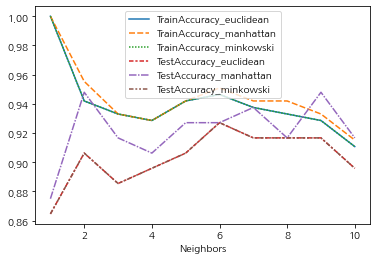

In [31]:
# 정확도를 그래프로 그림
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index = "Neighbors", columns = "Metric",
                                                    values = ["TrainAccuracy", "TestAccuracy"])

level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns = level0 + "_" + level1
sns.lineplot(data = df_accuracy_metric_pivot)

### 모델 Parameter 조정 결과 - Neighbors + Weight + Metric
- 앞서 설정한 Neighbor와 Weight을 토대로 Metric을 산출한 결과 Manhattan을 채택한다.

## 최종 모델 생성

In [32]:
# 최종 모델
knn_model = KNeighborsClassifier(n_neighbors = 6, weights = "uniform", metric = "manhattan")
knn_model.fit(df_train_x, df_train_y)

# 평가
y_pred = knn_model.predict(df_test_x)

# train 데이터 셋 정확도
print("train data accuracy: {0:.3f}".format(knn_model.score(df_train_x, df_train_y)))

# test 데이터 셋 정확도
print("test data accuracy: {0:.3f}\n".format(knn_model.score(df_test_x, df_test_y)))

# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

print(classification_report(df_test_y, y_pred, digits=3))

train data accuracy: 0.951
test data accuracy: 0.927

Confusion matrix: 
[[67  5]
 [ 2 22]]
              precision    recall  f1-score   support

           0      0.971     0.931     0.950        72
           1      0.815     0.917     0.863        24

    accuracy                          0.927        96
   macro avg      0.893     0.924     0.907        96
weighted avg      0.932     0.927     0.928        96



## <span style="color:red">결론</span>
- "유방암" 데이터에 대해서 KNN 모델을 생성하고, 범주를 예측해보았다.
- 우선, Hyper-parameter를 수정해나가며 모델의 정확도를 확인한 결과 다음과 같은 결과를 얻을 수 있었다.
    - 생성모델의 Train 데이터에 대한 정확도 : 95.1%
    - 생성모델의 Test 데이터에 대한 정확도 : 92.7%
- 생성한 모델의 정확도가 어느정도 높기에 해당 모델은 설명력이 있다고 말할 수 있다. 하지만 test 데이터에 대한 학습결과 과적합이 발생했다는 것 또한 알 수있다.